In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [141]:
train_set = pd.read_csv('archive/train.csv')
test_set = pd.read_csv('archive/test.csv')

In [142]:
df= pd.concat ([train_set, test_set])

In [143]:
train_set.drop_duplicates()
test_set.drop_duplicates()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,755547,44875,72509,67.58,74,16646,86,2591,14-05-1992,Self employed,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112388,716994,53549,72509,78.61,74,16646,86,2593,24-04-1984,Self employed,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
112389,709352,55243,72509,81.37,74,16646,86,2593,01-01-1986,Self employed,...,0,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0
112390,699795,55243,72509,81.37,74,16646,86,2593,01-01-1973,Self employed,...,0,0,0,0,0,1,1,0yrs 3mon,0yrs 3mon,0


In [144]:
train_set.head(5)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [145]:
train_set.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [146]:
train_set.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [147]:
test_set.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        3443
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [148]:
train_set['EMPLOYMENT_TYPE']= train_set.EMPLOYMENT_TYPE.fillna("Missing")
test_set['EMPLOYMENT_TYPE']= test_set.EMPLOYMENT_TYPE .fillna("Missing")

In [149]:
train_set['EMPLOYMENT_TYPE'].unique()

array(['Salaried', 'Self employed', 'Missing'], dtype=object)

In [150]:
train_set.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

In [151]:
train_set['DATE_OF_BIRTH'] = train_set['DATE_OF_BIRTH'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
test_set['DATE_OF_BIRTH'] = test_set['DATE_OF_BIRTH'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

train_set['DISBURSAL_DATE'] = train_set['DISBURSAL_DATE'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
test_set['DISBURSAL_DATE'] = test_set['DISBURSAL_DATE'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [152]:
train_set[['AVERAGE_ACCT_AGE_YR','AVERAGE_ACCT_AGE_MNT']]= train_set['AVERAGE_ACCT_AGE'].str.split('yrs', expand=True)
train_set[['AVERAGE_ACCT_AGE_MNT','AVERAGE_ACCT_AGE_MNT1']] =train_set['AVERAGE_ACCT_AGE_MNT'].str.split('mon', expand=True)
train_set['AVERAGE_ACCT_AGE'] = train_set['AVERAGE_ACCT_AGE_YR'].astype(str).astype(int) + ((train_set['AVERAGE_ACCT_AGE_MNT'].astype(str).astype(int))/12)
train_set=train_set.drop(columns= ["AVERAGE_ACCT_AGE_YR","AVERAGE_ACCT_AGE_MNT",'AVERAGE_ACCT_AGE_MNT1'])

test_set[['AVERAGE_ACCT_AGE_YR','AVERAGE_ACCT_AGE_MNT']]= test_set['AVERAGE_ACCT_AGE'].str.split('yrs', expand=True)
test_set[['AVERAGE_ACCT_AGE_MNT','AVERAGE_ACCT_AGE_MNT1']] =test_set['AVERAGE_ACCT_AGE_MNT'].str.split('mon', expand=True)
test_set['AVERAGE_ACCT_AGE'] = test_set['AVERAGE_ACCT_AGE_YR'].astype(str).astype(int) + ((test_set['AVERAGE_ACCT_AGE_MNT'].astype(str).astype(int))/12)
test_set=test_set.drop(columns= ["AVERAGE_ACCT_AGE_YR","AVERAGE_ACCT_AGE_MNT",'AVERAGE_ACCT_AGE_MNT1'])



In [153]:
train_set[['CREDIT_HISTORY_LENGTH_YR','CREDIT_HISTORY_LENGTH_MNT']]= train_set['CREDIT_HISTORY_LENGTH'].str.split('yrs', expand=True)
train_set[['CREDIT_HISTORY_LENGTH_MNT','CREDIT_HISTORY_LENGTH_MNT1']] =train_set['CREDIT_HISTORY_LENGTH_MNT'].str.split('mon', expand=True)
train_set['CREDIT_HISTORY_LENGTH'] = train_set['CREDIT_HISTORY_LENGTH_YR'].astype(str).astype(int) + ((train_set['CREDIT_HISTORY_LENGTH_MNT'].astype(str).astype(int))/12)
train_set=train_set.drop(columns= ["CREDIT_HISTORY_LENGTH_YR","CREDIT_HISTORY_LENGTH_MNT",'CREDIT_HISTORY_LENGTH_MNT1'])

test_set[['CREDIT_HISTORY_LENGTH_YR','CREDIT_HISTORY_LENGTH_MNT']]= test_set['CREDIT_HISTORY_LENGTH'].str.split('yrs', expand=True)
test_set[['CREDIT_HISTORY_LENGTH_MNT','CREDIT_HISTORY_LENGTH_MNT1']] =test_set['CREDIT_HISTORY_LENGTH_MNT'].str.split('mon', expand=True)
test_set['CREDIT_HISTORY_LENGTH'] = test_set['CREDIT_HISTORY_LENGTH_YR'].astype(str).astype(int) + ((test_set['CREDIT_HISTORY_LENGTH_MNT'].astype(str).astype(int))/12)
test_set=test_set.drop(columns= ["CREDIT_HISTORY_LENGTH_YR","CREDIT_HISTORY_LENGTH_MNT",'CREDIT_HISTORY_LENGTH_MNT1'])

In [154]:
train_set.head(5)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,31,0,0,0,0.666667,1.250000,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,1,1


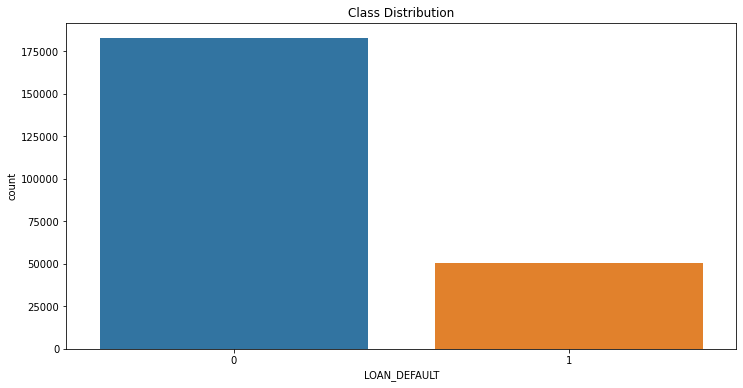

In [155]:


plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train_set) 
plt.title('Class Distribution')
plt.show()

In [156]:
dt= datetime.today()

train_set['APPLICANT_AGE'] = ((dt - train_set['DATE_OF_BIRTH']) / 365).apply(lambda x: float(x.days))

In [157]:
train_set['APPLICANT_AGE'].dtypes

dtype('float64')

In [158]:

train_set['APPLICANT_AGE_bins'] = pd.cut(x=train_set['APPLICANT_AGE'], bins=[23, 29, 39, 49, 59, 69])
train_set['APPLICANT_AGE_bins'].value_counts()

(29, 39]    87151
(39, 49]    56803
(23, 29]    51889
(49, 59]    28641
(59, 69]     6143
Name: APPLICANT_AGE_bins, dtype: int64

In [159]:
train_set

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,APPLICANT_AGE,APPLICANT_AGE_bins
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0.000000,0.000000,0,0,38.0,"(29, 39]"
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,1991,0,0,1,1.916667,1.916667,0,1,37.0,"(29, 39]"
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0.000000,0.000000,0,0,37.0,"(29, 39]"
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,31,0,0,0,0.666667,1.250000,1,1,28.0,"(23, 29]"
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0.000000,0.000000,1,1,44.0,"(39, 49]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-08-01,Salaried,...,4084,0,0,0,1.750000,3.250000,0,0,34.0,"(29, 39]"
233150,606141,73651,100600,74.95,34,23775,51,990,1988-12-05,Self employed,...,1565,0,0,0,0.500000,0.500000,0,0,33.0,"(29, 39]"
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-06-01,Salaried,...,0,0,0,0,0.000000,0.000000,0,0,46.0,"(39, 49]"
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,Salaried,...,0,0,0,0,0.000000,0.000000,0,0,28.0,"(23, 29]"


<Figure size 720x3600 with 0 Axes>

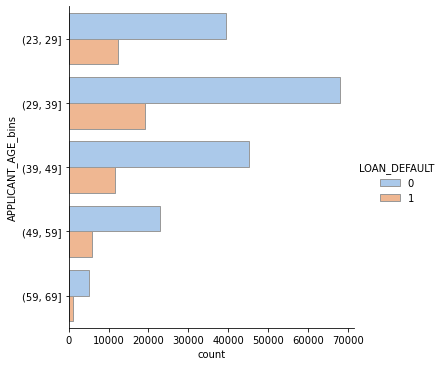

In [160]:
plt.figure(figsize=(10,50))

sns.catplot(y='APPLICANT_AGE_bins', hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train_set);

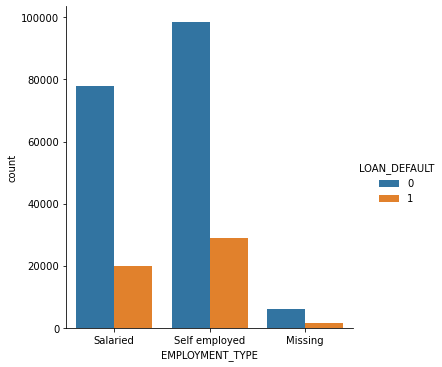

In [161]:
sns.catplot(data=train_set,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


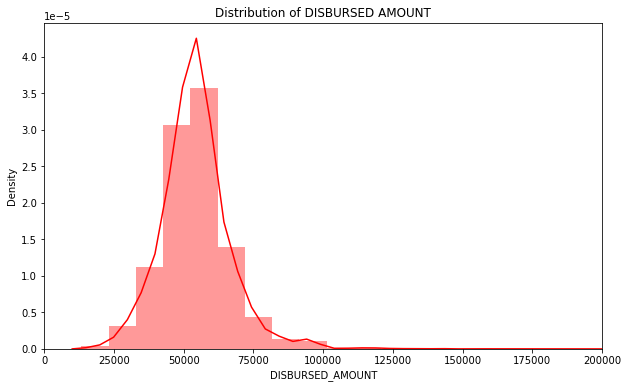

In [162]:
plt.figure(figsize=(10,6))
plt.title("Distribution of DISBURSED AMOUNT")
sns.distplot(train_set["DISBURSED_AMOUNT"].dropna(),color='red', kde=True,bins=100)
plt.xlim(0, 200000)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


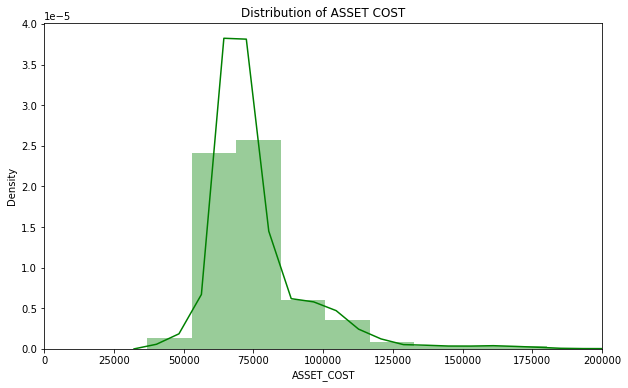

In [163]:
plt.figure(figsize=(10,6))
plt.title("Distribution of ASSET COST")
sns.distplot(train_set["ASSET_COST"].dropna(),color='green', kde=True,bins=100)
plt.xlim(0, 200000)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


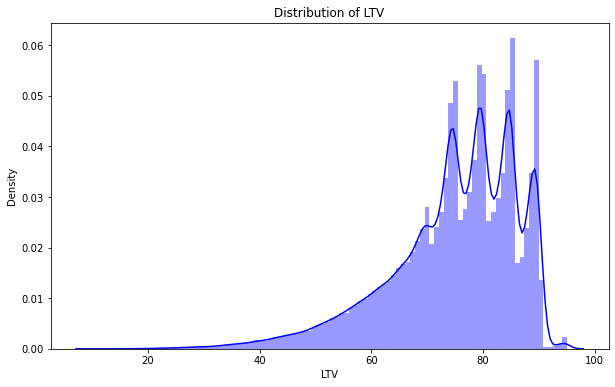

In [164]:
plt.figure(figsize=(10,6))
plt.title("Distribution of LTV")
sns.distplot(train_set["LTV"].dropna(),color='BLUE', kde=True,bins=100)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


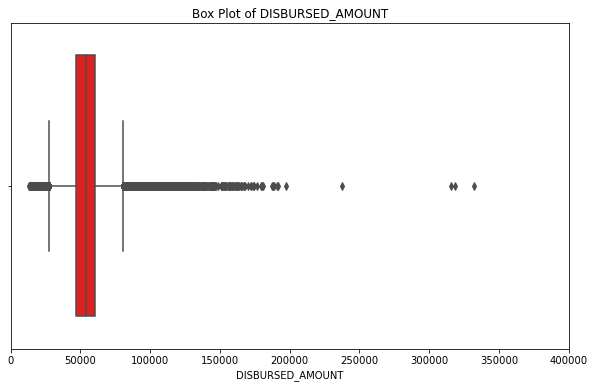

In [165]:
plt.figure(figsize=(10,6))
plt.title("Box Plot of DISBURSED_AMOUNT")
sns.boxplot(train_set['DISBURSED_AMOUNT'],color='red')
plt.xlim(0, 400000)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


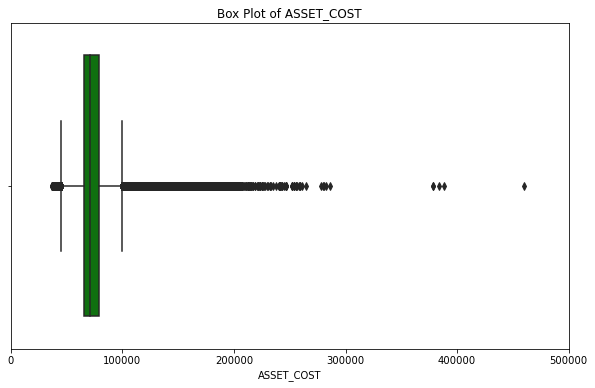

In [166]:
plt.figure(figsize=(10,6))
plt.title("Box Plot of ASSET_COST")
sns.boxplot(train_set['ASSET_COST'],color='green')
plt.xlim(0, 500000)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


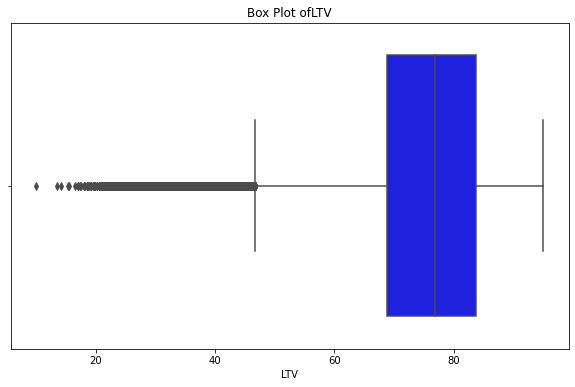

In [167]:
plt.figure(figsize=(10,6))
plt.title("Box Plot ofLTV")
sns.boxplot(train_set['LTV'],color='blue')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


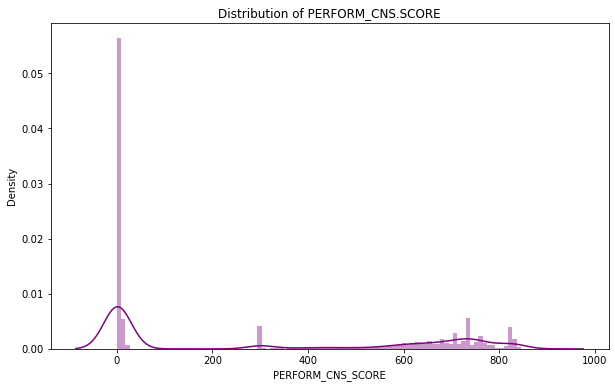

In [168]:
plt.figure(figsize=(10,6))
plt.title("Distribution of PERFORM_CNS.SCORE")
sns.distplot(train_set["PERFORM_CNS_SCORE"],color='purple', kde=True,bins=100)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


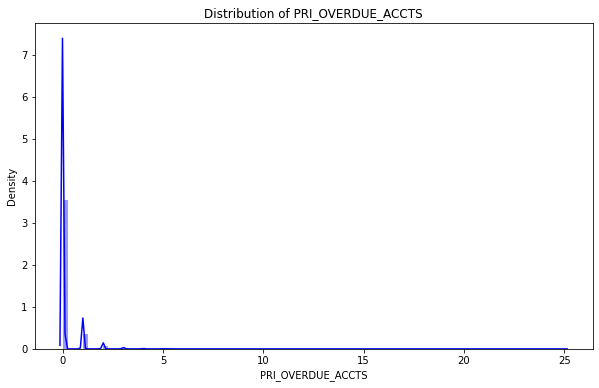

In [169]:
plt.figure(figsize=(10,6))
plt.title("Distribution of PRI_OVERDUE_ACCTS")
sns.distplot(train_set["PRI_OVERDUE_ACCTS"].dropna(),color='BLUE', kde=True,bins=100)
plt.show()

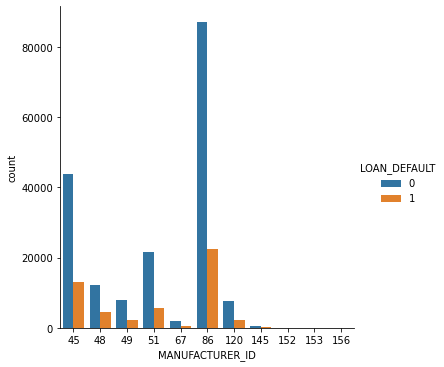

In [170]:
sns.catplot(data=train_set,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

In [171]:
train_set = train_set.drop([ 'UNIQUEID','DATE_OF_BIRTH'],axis=1)

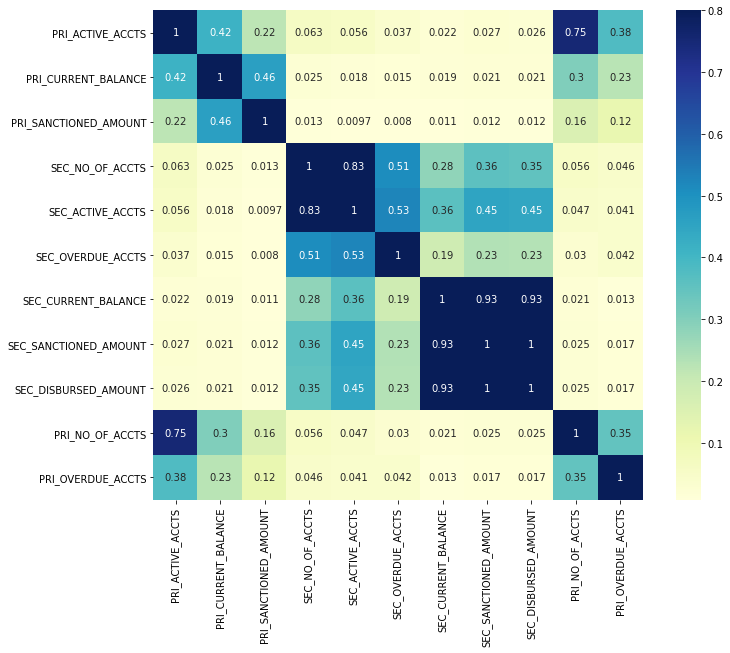

In [172]:
cols = train_set[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT',  'PRI_NO_OF_ACCTS', 'PRI_OVERDUE_ACCTS']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

In [173]:
train_set = train_set.drop([ 'PRI_DISBURSED_AMOUNT','SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT'],axis=1)

In [174]:
corr = train_set.corr()

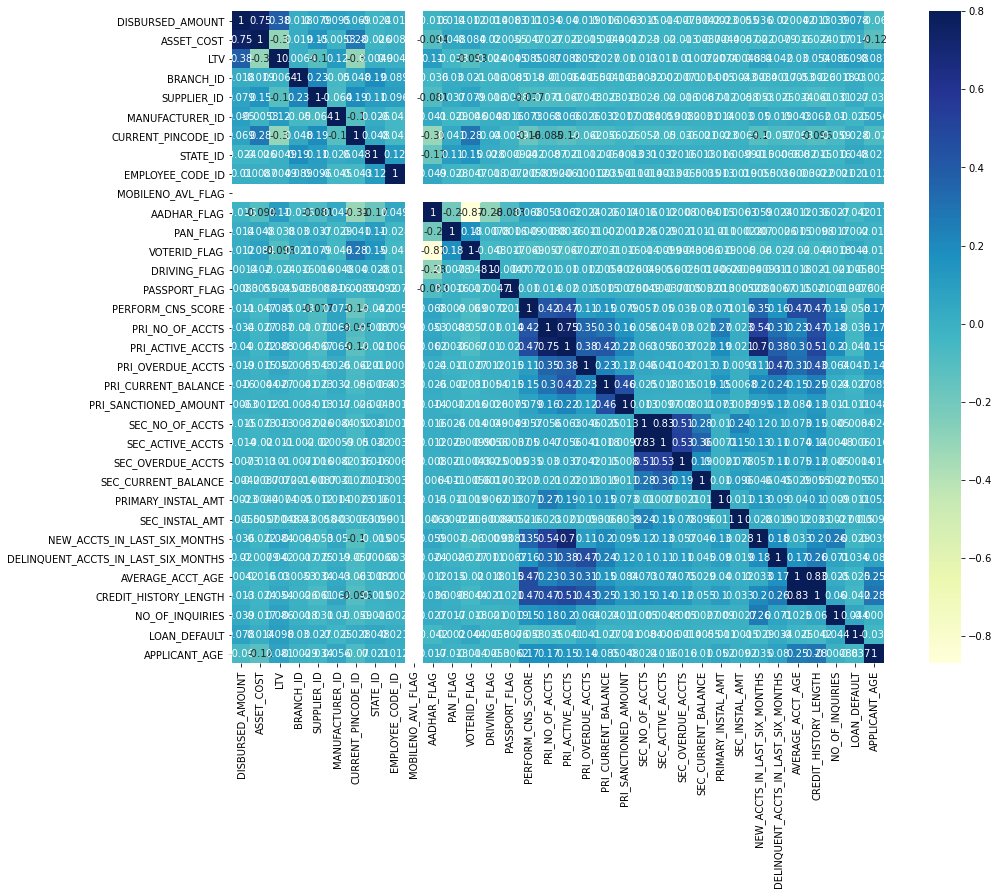

In [175]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

In [176]:
train_set = train_set.drop(['AVERAGE_ACCT_AGE','PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS','MOBILENO_AVL_FLAG', 'DISBURSAL_DATE','APPLICANT_AGE_bins','APPLICANT_AGE_bins','BRANCH_ID', 'MANUFACTURER_ID',
       'STATE_ID','SUPPLIER_ID','EMPLOYEE_CODE_ID','CURRENT_PINCODE_ID','SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE','PERFORM_CNS_SCORE','SEC_INSTAL_AMT'],axis=1)

In [177]:

train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['A-Very Low Risk','D-Very Low Risk','B-Very Low Risk','C-Very Low Risk'],1)
train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['M-Very High Risk','L-Very High Risk'],5)
train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['F-Low Risk','E-Low Risk','G-Low Risk'],2)
train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['K-High Risk','J-High Risk'],4)
train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['H-Medium Risk','I-Medium Risk'],3)
train_set['PERFORM_CNS_SCORE_DESCRIPTION']=train_set['PERFORM_CNS_SCORE_DESCRIPTION'].replace(['Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Scored: Only a Guarantor','Not Scored: More than 50 active Accounts found','No Bureau History Available'],0)

In [178]:
train_set.head(5)

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,...,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,APPLICANT_AGE
0,50578,58400,89.55,Salaried,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,0,38.0
1,47145,65550,73.23,Self employed,1,0,0,0,0,3,...,27600,50200,1991,0,0,1,1.916667,0,1,37.0
2,53278,61360,89.63,Self employed,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,0,37.0
3,57513,66113,88.48,Self employed,1,0,0,0,0,5,...,0,0,31,0,0,0,1.250000,1,1,28.0
4,52378,60300,88.39,Self employed,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,1,44.0


In [179]:
train_set.dtypes

DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
EMPLOYMENT_TYPE                         object
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE_DESCRIPTION            int64
PRI_NO_OF_ACCTS                          int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_BALANCE                      int64
PRI_SANCTIONED_AMOUNT                    int64
PRIMARY_INSTAL_AMT                       int64
SEC_INSTAL_AMT                           int64
NEW_ACCTS_IN_LAST_SIX_MONTHS             int64
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS      int64
CREDIT_HISTORY_LENGTH                  float64
NO_OF_INQUIRIES                          int64
LOAN_DEFAULT                             int64
APPLICANT_AGE

In [180]:
dummies = pd.get_dummies(train_set['EMPLOYMENT_TYPE'])


In [181]:
dummies

,Missing,Salaried,Self employed
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
233149,0,1,0
233150,0,0,1
233151,0,1,0
233152,0,1,0


In [182]:
merged = pd.concat([train_set,dummies],axis=1) 

In [183]:
train_df = merged.drop(['EMPLOYMENT_TYPE'], axis=1)

In [184]:
train_df.rename(columns={'Self employed':'Self_employed'},inplace = True)

In [185]:
train_set['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    129785
1     50728
2     18294
3     12412
4     12025
5      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [186]:
train_set['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

0    129785
1     50728
2     18294
3     12412
4     12025
5      9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

In [187]:
y_df = train_df['LOAN_DEFAULT']
X_df = train_df.loc[:, train_df.columns != 'LOAN_DEFAULT']

In [188]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df)

In [189]:
def modelEvaluation(model, X_test, y_train,y_test, y_pred,cols=None):
    print("Accurancy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("F1 Score:: {:.3f} ".format(f1_score(y_test, y_pred)))
    print("Balanced Accurancy Score:: {:.3f} ".format(balanced_accuracy_score(y_test, y_pred)))
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [190]:
classifier  = LogisticRegression()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, x_train.columns)

Accurancy: 0.784
ROC AUC Score: 0.500
F1 Score:: 0.000 
Balanced Accurancy Score:: 0.500 

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45713
           1       0.00      0.00      0.00     12576

    accuracy                           0.78     58289
   macro avg       0.39      0.50      0.44     58289
weighted avg       0.62      0.78      0.69     58289

[[45712     1]
 [12576     0]]


In [191]:
classifier  = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, x_train.columns)

Accurancy: 0.666
ROC AUC Score: 0.520
F1 Score:: 0.253 
Balanced Accurancy Score:: 0.520 

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78     45713
           1       0.24      0.26      0.25     12576

    accuracy                           0.67     58289
   macro avg       0.52      0.52      0.52     58289
weighted avg       0.67      0.67      0.67     58289

[[35486 10227]
 [ 9268  3308]]


In [192]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, x_train.columns)

Accurancy: 0.773
ROC AUC Score: 0.511
F1 Score:: 0.086 
Balanced Accurancy Score:: 0.511 

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     45713
           1       0.33      0.05      0.09     12576

    accuracy                           0.77     58289
   macro avg       0.56      0.51      0.48     58289
weighted avg       0.69      0.77      0.70     58289

[[44458  1255]
 [11956   620]]


In [193]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, x_train.columns)

Accurancy: 0.785
ROC AUC Score: 0.502
F1 Score:: 0.009 
Balanced Accurancy Score:: 0.502 

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45713
           1       0.62      0.00      0.01     12576

    accuracy                           0.78     58289
   macro avg       0.70      0.50      0.44     58289
weighted avg       0.75      0.78      0.69     58289

[[45679    34]
 [12521    55]]


In [203]:
from imblearn.over_sampling import SMOTE


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [207]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, X_train.columns)

Accurancy: 0.782
ROC AUC Score: 0.502
F1 Score:: 0.008 
Balanced Accurancy Score:: 0.502 

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45561
           1       0.61      0.00      0.01     12728

    accuracy                           0.78     58289
   macro avg       0.70      0.50      0.44     58289
weighted avg       0.75      0.78      0.69     58289

[[45529    32]
 [12677    51]]


In [208]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predict = classifier.predict(x_test)
modelEvaluation(classifier,x_test, y_train, y_test, y_predict, x_train.columns)

Accurancy: 0.781
ROC AUC Score: 0.500
F1 Score:: 0.004 
Balanced Accurancy Score:: 0.500 

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     45561
           1       0.26      0.00      0.00     12728

    accuracy                           0.78     58289
   macro avg       0.52      0.50      0.44     58289
weighted avg       0.67      0.78      0.69     58289

[[45495    66]
 [12705    23]]


In [206]:
X_train = X_train.drop('SEC_INSTAL_AMT',axis=1)

In [209]:
#saving the model to file
import pickle
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [199]:
import streamlit

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
cns_score = {'Very High Risk': 5, 'High Risk': 4, 'Medium Risk': 3, 'Low Risk': 2, 'Very Low Risk': 1, 'No Score': 0}

In [212]:
cns_score.get('Very High Risk')

5